# exp2
___
実験2:生データの座標推定の精度(最も簡単な1×1の欠陥を利用)

In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_position_raw_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_position_raw_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_position_raw_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_position_raw_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_raw_data.csv'

### 入力データと正解データ
no_hole_data = []
x_data = []
y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    x_data.append(data_array[1:-1])
    y_data.append(data_array[0])
# with open(four_holes_path) as fp2:
#   for line in fp2:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])
# with open(nine_holes_path) as fp3:
#   for line in fp3:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])
# with open(sixteen_holes_path) as fp4:
#   for line in fp4:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])
# with open(twentyfive_holes_path) as fp5:
#   for line in fp5:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
x_data = np.array(x_data, dtype=float)
y_data = np.array(y_data, dtype=int)

### データの加工
x_data = (x_data-no_hole_data)
y_data = keras.utils.to_categorical(y_data, 2209)

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

### reshape
x_train = x_train.reshape(1767, 50, 1)
x_test = x_test.reshape(442, 50, 1)

In [5]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(2209, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [6]:
# 学習(位置)
epochs = 4000
batch_size = 128
position_history = position_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 1767 samples, validate on 442 samples
Epoch 1/4000
1767/1767 [==============================] - 1s 670us/step - loss: 8.2377 - accuracy: 0.0000e+00 - val_loss: 8.9524 - val_accuracy: 0.0000e+00
Epoch 2/4000
1767/1767 [==============================] - 1s 320us/step - loss: 7.7029 - accuracy: 0.0000e+00 - val_loss: 9.7332 - val_accuracy: 0.0000e+00
Epoch 3/4000
1767/1767 [==============================] - 1s 302us/step - loss: 7.5916 - accuracy: 5.6593e-04 - val_loss: 10.1630 - val_accuracy: 0.0000e+00
Epoch 4/4000
1767/1767 [==============================] - 1s 297us/step - loss: 7.5657 - accuracy: 5.6593e-04 - val_loss: 10.4451 - val_accuracy: 0.0000e+00
Epoch 5/4000
1767/1767 [==============================] - 1s 289us/step - loss: 7.5573 - accuracy: 5.6593e-04 - val_loss: 10.6459 - val_accuracy: 0.0000e+00
Epoch 6/4000
1767/1767 [==============================] - 1s 297us/step - loss: 7.5516 - accuracy: 5.6593e-04 - val_loss: 10.7907 - val_accuracy: 0.0000e+00
Epoch 7/4000


1767/1767 [==============================] - 1s 296us/step - loss: 7.4896 - accuracy: 0.0040 - val_loss: 12.1153 - val_accuracy: 0.0000e+00
Epoch 54/4000
1767/1767 [==============================] - 1s 313us/step - loss: 7.4892 - accuracy: 0.0045 - val_loss: 12.1446 - val_accuracy: 0.0000e+00
Epoch 55/4000
1767/1767 [==============================] - 1s 347us/step - loss: 7.4887 - accuracy: 0.0045 - val_loss: 12.1896 - val_accuracy: 0.0000e+00
Epoch 56/4000
1767/1767 [==============================] - 1s 315us/step - loss: 7.4886 - accuracy: 0.0045 - val_loss: 12.2005 - val_accuracy: 0.0000e+00
Epoch 57/4000
1767/1767 [==============================] - 1s 303us/step - loss: 7.4872 - accuracy: 0.0040 - val_loss: 12.2241 - val_accuracy: 0.0000e+00
Epoch 58/4000
1767/1767 [==============================] - 1s 352us/step - loss: 7.4878 - accuracy: 0.0040 - val_loss: 12.2800 - val_accuracy: 0.0000e+00
Epoch 59/4000
1767/1767 [==============================] - 1s 334us/step - loss: 7.4870 - 

Epoch 106/4000
1767/1767 [==============================] - 1s 352us/step - loss: 7.4708 - accuracy: 0.0062 - val_loss: 13.4040 - val_accuracy: 0.0000e+00
Epoch 107/4000
1767/1767 [==============================] - 1s 307us/step - loss: 7.4705 - accuracy: 0.0068 - val_loss: 13.5213 - val_accuracy: 0.0000e+00
Epoch 108/4000
1767/1767 [==============================] - 1s 314us/step - loss: 7.4706 - accuracy: 0.0079 - val_loss: 13.5043 - val_accuracy: 0.0000e+00
Epoch 109/4000
1767/1767 [==============================] - 1s 294us/step - loss: 7.4699 - accuracy: 0.0057 - val_loss: 13.4000 - val_accuracy: 0.0000e+00
Epoch 110/4000
1767/1767 [==============================] - 1s 289us/step - loss: 7.4700 - accuracy: 0.0068 - val_loss: 13.4542 - val_accuracy: 0.0000e+00
Epoch 111/4000
1767/1767 [==============================] - 1s 382us/step - loss: 7.4689 - accuracy: 0.0062 - val_loss: 13.4699 - val_accuracy: 0.0000e+00
Epoch 112/4000
1767/1767 [==============================] - 1s 329us/s

Epoch 159/4000
1767/1767 [==============================] - 1s 300us/step - loss: 7.4488 - accuracy: 0.0102 - val_loss: 14.8122 - val_accuracy: 0.0000e+00
Epoch 160/4000
1767/1767 [==============================] - 1s 295us/step - loss: 7.4477 - accuracy: 0.0119 - val_loss: 14.8493 - val_accuracy: 0.0000e+00
Epoch 161/4000
1767/1767 [==============================] - 1s 304us/step - loss: 7.4484 - accuracy: 0.0113 - val_loss: 14.8996 - val_accuracy: 0.0000e+00
Epoch 162/4000
1767/1767 [==============================] - 1s 304us/step - loss: 7.4478 - accuracy: 0.0125 - val_loss: 14.9455 - val_accuracy: 0.0000e+00
Epoch 163/4000
1767/1767 [==============================] - 1s 298us/step - loss: 7.4480 - accuracy: 0.0108 - val_loss: 14.8266 - val_accuracy: 0.0000e+00
Epoch 164/4000
1767/1767 [==============================] - 1s 343us/step - loss: 7.4468 - accuracy: 0.0113 - val_loss: 15.0421 - val_accuracy: 0.0000e+00
Epoch 165/4000
1767/1767 [==============================] - 1s 319us/s

Epoch 212/4000
1767/1767 [==============================] - 1s 421us/step - loss: 7.4206 - accuracy: 0.0136 - val_loss: 16.3193 - val_accuracy: 0.0000e+00
Epoch 213/4000
1767/1767 [==============================] - 1s 348us/step - loss: 7.4215 - accuracy: 0.0158 - val_loss: 16.3962 - val_accuracy: 0.0000e+00
Epoch 214/4000
1767/1767 [==============================] - 1s 352us/step - loss: 7.4185 - accuracy: 0.0153 - val_loss: 16.3859 - val_accuracy: 0.0000e+00
Epoch 215/4000
1767/1767 [==============================] - 1s 362us/step - loss: 7.4193 - accuracy: 0.0130 - val_loss: 16.4345 - val_accuracy: 0.0000e+00
Epoch 216/4000
1767/1767 [==============================] - 1s 348us/step - loss: 7.4195 - accuracy: 0.0147 - val_loss: 16.5048 - val_accuracy: 0.0000e+00
Epoch 217/4000
1767/1767 [==============================] - 1s 303us/step - loss: 7.4171 - accuracy: 0.0136 - val_loss: 16.4561 - val_accuracy: 0.0000e+00
Epoch 218/4000
1767/1767 [==============================] - 1s 362us/s

Epoch 265/4000
1767/1767 [==============================] - 1s 290us/step - loss: 7.3890 - accuracy: 0.0164 - val_loss: 17.8099 - val_accuracy: 0.0000e+00
Epoch 266/4000
1767/1767 [==============================] - 1s 337us/step - loss: 7.3876 - accuracy: 0.0158 - val_loss: 17.8502 - val_accuracy: 0.0000e+00
Epoch 267/4000
1767/1767 [==============================] - 1s 321us/step - loss: 7.3870 - accuracy: 0.0181 - val_loss: 17.8903 - val_accuracy: 0.0000e+00
Epoch 268/4000
1767/1767 [==============================] - 1s 291us/step - loss: 7.3868 - accuracy: 0.0170 - val_loss: 17.8841 - val_accuracy: 0.0000e+00
Epoch 269/4000
1767/1767 [==============================] - 1s 291us/step - loss: 7.3876 - accuracy: 0.0181 - val_loss: 17.9614 - val_accuracy: 0.0000e+00
Epoch 270/4000
1767/1767 [==============================] - 1s 292us/step - loss: 7.3863 - accuracy: 0.0175 - val_loss: 17.9061 - val_accuracy: 0.0000e+00
Epoch 271/4000
1767/1767 [==============================] - 1s 299us/s

Epoch 318/4000
1767/1767 [==============================] - 1s 337us/step - loss: 7.3584 - accuracy: 0.0198 - val_loss: 19.0484 - val_accuracy: 0.0000e+00
Epoch 319/4000
1767/1767 [==============================] - 1s 306us/step - loss: 7.3584 - accuracy: 0.0215 - val_loss: 19.0771 - val_accuracy: 0.0000e+00
Epoch 320/4000
1767/1767 [==============================] - 1s 296us/step - loss: 7.3570 - accuracy: 0.0204 - val_loss: 19.1553 - val_accuracy: 0.0000e+00
Epoch 321/4000
1767/1767 [==============================] - 1s 298us/step - loss: 7.3564 - accuracy: 0.0198 - val_loss: 19.1072 - val_accuracy: 0.0000e+00
Epoch 322/4000
1767/1767 [==============================] - 1s 328us/step - loss: 7.3559 - accuracy: 0.0204 - val_loss: 19.1686 - val_accuracy: 0.0000e+00
Epoch 323/4000
1767/1767 [==============================] - 1s 328us/step - loss: 7.3561 - accuracy: 0.0209 - val_loss: 19.1346 - val_accuracy: 0.0000e+00
Epoch 324/4000
1767/1767 [==============================] - 1s 304us/s

Epoch 371/4000
1767/1767 [==============================] - 1s 295us/step - loss: 7.3274 - accuracy: 0.0266 - val_loss: 20.1635 - val_accuracy: 0.0000e+00
Epoch 372/4000
1767/1767 [==============================] - 1s 309us/step - loss: 7.3293 - accuracy: 0.0238 - val_loss: 20.1507 - val_accuracy: 0.0000e+00
Epoch 373/4000
1767/1767 [==============================] - 1s 292us/step - loss: 7.3280 - accuracy: 0.0249 - val_loss: 20.1780 - val_accuracy: 0.0000e+00
Epoch 374/4000
1767/1767 [==============================] - 1s 313us/step - loss: 7.3272 - accuracy: 0.0249 - val_loss: 20.2160 - val_accuracy: 0.0000e+00
Epoch 375/4000
1767/1767 [==============================] - 1s 299us/step - loss: 7.3267 - accuracy: 0.0238 - val_loss: 20.2143 - val_accuracy: 0.0000e+00
Epoch 376/4000
1767/1767 [==============================] - 1s 324us/step - loss: 7.3275 - accuracy: 0.0260 - val_loss: 20.3038 - val_accuracy: 0.0000e+00
Epoch 377/4000
1767/1767 [==============================] - 1s 325us/s

Epoch 424/4000
1767/1767 [==============================] - 1s 288us/step - loss: 7.3030 - accuracy: 0.0272 - val_loss: 21.3912 - val_accuracy: 0.0000e+00
Epoch 425/4000
1767/1767 [==============================] - 1s 300us/step - loss: 7.3003 - accuracy: 0.0255 - val_loss: 21.2822 - val_accuracy: 0.0000e+00
Epoch 426/4000
1767/1767 [==============================] - 1s 289us/step - loss: 7.2998 - accuracy: 0.0266 - val_loss: 21.3635 - val_accuracy: 0.0000e+00
Epoch 427/4000
1767/1767 [==============================] - 1s 294us/step - loss: 7.2975 - accuracy: 0.0266 - val_loss: 21.4194 - val_accuracy: 0.0000e+00
Epoch 428/4000
1767/1767 [==============================] - 1s 285us/step - loss: 7.2975 - accuracy: 0.0266 - val_loss: 21.4576 - val_accuracy: 0.0000e+00
Epoch 429/4000
1767/1767 [==============================] - 1s 296us/step - loss: 7.2973 - accuracy: 0.0272 - val_loss: 21.3896 - val_accuracy: 0.0000e+00
Epoch 430/4000
1767/1767 [==============================] - 1s 293us/s

Epoch 477/4000
1767/1767 [==============================] - 1s 343us/step - loss: 7.2739 - accuracy: 0.0289 - val_loss: 22.4282 - val_accuracy: 0.0000e+00
Epoch 478/4000
1767/1767 [==============================] - 1s 311us/step - loss: 7.2710 - accuracy: 0.0283 - val_loss: 22.5354 - val_accuracy: 0.0000e+00
Epoch 479/4000
1767/1767 [==============================] - 1s 295us/step - loss: 7.2688 - accuracy: 0.0277 - val_loss: 22.5134 - val_accuracy: 0.0000e+00
Epoch 480/4000
1767/1767 [==============================] - 1s 294us/step - loss: 7.2669 - accuracy: 0.0294 - val_loss: 22.4342 - val_accuracy: 0.0000e+00
Epoch 481/4000
1767/1767 [==============================] - 1s 294us/step - loss: 7.2705 - accuracy: 0.0300 - val_loss: 22.5845 - val_accuracy: 0.0000e+00
Epoch 482/4000
1767/1767 [==============================] - 1s 286us/step - loss: 7.2692 - accuracy: 0.0294 - val_loss: 22.5060 - val_accuracy: 0.0000e+00
Epoch 483/4000
1767/1767 [==============================] - 1s 297us/s

Epoch 530/4000
1767/1767 [==============================] - 1s 338us/step - loss: 7.2424 - accuracy: 0.0283 - val_loss: 23.5292 - val_accuracy: 0.0000e+00
Epoch 531/4000
1767/1767 [==============================] - 1s 331us/step - loss: 7.2419 - accuracy: 0.0294 - val_loss: 23.5630 - val_accuracy: 0.0000e+00
Epoch 532/4000
1767/1767 [==============================] - 1s 336us/step - loss: 7.2413 - accuracy: 0.0311 - val_loss: 23.5779 - val_accuracy: 0.0000e+00
Epoch 533/4000
1767/1767 [==============================] - 1s 360us/step - loss: 7.2414 - accuracy: 0.0300 - val_loss: 23.6558 - val_accuracy: 0.0000e+00
Epoch 534/4000
1767/1767 [==============================] - 1s 350us/step - loss: 7.2403 - accuracy: 0.0306 - val_loss: 23.5566 - val_accuracy: 0.0000e+00
Epoch 535/4000
1767/1767 [==============================] - 1s 382us/step - loss: 7.2406 - accuracy: 0.0306 - val_loss: 23.5943 - val_accuracy: 0.0000e+00
Epoch 536/4000
1767/1767 [==============================] - 1s 331us/s

Epoch 583/4000
1767/1767 [==============================] - 1s 308us/step - loss: 7.2183 - accuracy: 0.0306 - val_loss: 24.4827 - val_accuracy: 0.0000e+00
Epoch 584/4000
1767/1767 [==============================] - 1s 304us/step - loss: 7.2157 - accuracy: 0.0334 - val_loss: 24.5767 - val_accuracy: 0.0000e+00
Epoch 585/4000
1767/1767 [==============================] - 1s 322us/step - loss: 7.2136 - accuracy: 0.0334 - val_loss: 24.5535 - val_accuracy: 0.0000e+00
Epoch 586/4000
1767/1767 [==============================] - 1s 313us/step - loss: 7.2143 - accuracy: 0.0311 - val_loss: 24.5420 - val_accuracy: 0.0000e+00
Epoch 587/4000
1767/1767 [==============================] - 1s 312us/step - loss: 7.2136 - accuracy: 0.0311 - val_loss: 24.6136 - val_accuracy: 0.0000e+00
Epoch 588/4000
1767/1767 [==============================] - 1s 317us/step - loss: 7.2124 - accuracy: 0.0317 - val_loss: 24.6471 - val_accuracy: 0.0000e+00
Epoch 589/4000
1767/1767 [==============================] - 1s 302us/s

Epoch 636/4000
1767/1767 [==============================] - 1s 320us/step - loss: 7.1898 - accuracy: 0.0351 - val_loss: 25.4336 - val_accuracy: 0.0000e+00
Epoch 637/4000
1767/1767 [==============================] - 1s 303us/step - loss: 7.1885 - accuracy: 0.0323 - val_loss: 25.4322 - val_accuracy: 0.0000e+00
Epoch 638/4000
1767/1767 [==============================] - 1s 293us/step - loss: 7.1887 - accuracy: 0.0357 - val_loss: 25.4871 - val_accuracy: 0.0000e+00
Epoch 639/4000
1767/1767 [==============================] - 1s 303us/step - loss: 7.1931 - accuracy: 0.0368 - val_loss: 25.6507 - val_accuracy: 0.0000e+00
Epoch 640/4000
1767/1767 [==============================] - 1s 298us/step - loss: 7.1934 - accuracy: 0.0311 - val_loss: 25.4699 - val_accuracy: 0.0000e+00
Epoch 641/4000
1767/1767 [==============================] - 1s 356us/step - loss: 7.1905 - accuracy: 0.0351 - val_loss: 25.4603 - val_accuracy: 0.0000e+00
Epoch 642/4000
1767/1767 [==============================] - 1s 396us/s

Epoch 689/4000
1767/1767 [==============================] - 1s 300us/step - loss: 7.1651 - accuracy: 0.0385 - val_loss: 26.2471 - val_accuracy: 0.0000e+00
Epoch 690/4000
1767/1767 [==============================] - 1s 297us/step - loss: 7.1645 - accuracy: 0.0379 - val_loss: 26.2499 - val_accuracy: 0.0000e+00
Epoch 691/4000
1767/1767 [==============================] - 1s 323us/step - loss: 7.1668 - accuracy: 0.0368 - val_loss: 26.2032 - val_accuracy: 0.0000e+00
Epoch 692/4000
1767/1767 [==============================] - 1s 352us/step - loss: 7.1655 - accuracy: 0.0368 - val_loss: 26.2982 - val_accuracy: 0.0000e+00
Epoch 693/4000
1767/1767 [==============================] - 1s 356us/step - loss: 7.1628 - accuracy: 0.0374 - val_loss: 26.3442 - val_accuracy: 0.0000e+00
Epoch 694/4000
1767/1767 [==============================] - 1s 316us/step - loss: 7.1634 - accuracy: 0.0379 - val_loss: 26.2730 - val_accuracy: 0.0000e+00
Epoch 695/4000
1767/1767 [==============================] - 1s 309us/s

Epoch 742/4000
1767/1767 [==============================] - 0s 271us/step - loss: 7.1453 - accuracy: 0.0379 - val_loss: 26.9946 - val_accuracy: 0.0000e+00
Epoch 743/4000
1767/1767 [==============================] - 0s 270us/step - loss: 7.1421 - accuracy: 0.0396 - val_loss: 26.9115 - val_accuracy: 0.0000e+00
Epoch 744/4000
1767/1767 [==============================] - 0s 270us/step - loss: 7.1478 - accuracy: 0.0385 - val_loss: 27.0932 - val_accuracy: 0.0000e+00
Epoch 745/4000
1767/1767 [==============================] - 0s 271us/step - loss: 7.1432 - accuracy: 0.0413 - val_loss: 27.0801 - val_accuracy: 0.0000e+00
Epoch 746/4000
1767/1767 [==============================] - 0s 280us/step - loss: 7.1429 - accuracy: 0.0368 - val_loss: 26.9918 - val_accuracy: 0.0000e+00
Epoch 747/4000
1767/1767 [==============================] - 0s 274us/step - loss: 7.1417 - accuracy: 0.0390 - val_loss: 27.0168 - val_accuracy: 0.0000e+00
Epoch 748/4000
1767/1767 [==============================] - 0s 271us/s

Epoch 795/4000
1767/1767 [==============================] - 0s 274us/step - loss: 7.1232 - accuracy: 0.0402 - val_loss: 27.6481 - val_accuracy: 0.0000e+00
Epoch 796/4000
1767/1767 [==============================] - 0s 275us/step - loss: 7.1210 - accuracy: 0.0413 - val_loss: 27.6313 - val_accuracy: 0.0000e+00
Epoch 797/4000
1767/1767 [==============================] - 0s 269us/step - loss: 7.1219 - accuracy: 0.0419 - val_loss: 27.7361 - val_accuracy: 0.0000e+00
Epoch 798/4000
1767/1767 [==============================] - 0s 271us/step - loss: 7.1228 - accuracy: 0.0419 - val_loss: 27.7351 - val_accuracy: 0.0000e+00
Epoch 799/4000
1767/1767 [==============================] - 0s 271us/step - loss: 7.1244 - accuracy: 0.0407 - val_loss: 27.7001 - val_accuracy: 0.0000e+00
Epoch 800/4000
1767/1767 [==============================] - 0s 272us/step - loss: 7.1219 - accuracy: 0.0424 - val_loss: 27.6558 - val_accuracy: 0.0000e+00
Epoch 801/4000
1767/1767 [==============================] - 0s 272us/s

Epoch 848/4000
1767/1767 [==============================] - 0s 276us/step - loss: 7.1015 - accuracy: 0.0436 - val_loss: 28.2925 - val_accuracy: 0.0000e+00
Epoch 849/4000
1767/1767 [==============================] - 0s 270us/step - loss: 7.1016 - accuracy: 0.0430 - val_loss: 28.3398 - val_accuracy: 0.0000e+00
Epoch 850/4000
1767/1767 [==============================] - 0s 277us/step - loss: 7.1024 - accuracy: 0.0407 - val_loss: 28.3167 - val_accuracy: 0.0000e+00
Epoch 851/4000
1767/1767 [==============================] - 0s 274us/step - loss: 7.0998 - accuracy: 0.0390 - val_loss: 28.2206 - val_accuracy: 0.0000e+00
Epoch 852/4000
1767/1767 [==============================] - 0s 283us/step - loss: 7.1043 - accuracy: 0.0402 - val_loss: 28.3558 - val_accuracy: 0.0000e+00
Epoch 853/4000
1767/1767 [==============================] - 1s 285us/step - loss: 7.1031 - accuracy: 0.0441 - val_loss: 28.4036 - val_accuracy: 0.0000e+00
Epoch 854/4000
1767/1767 [==============================] - 0s 280us/s

Epoch 901/4000
1767/1767 [==============================] - 0s 268us/step - loss: 7.0775 - accuracy: 0.0424 - val_loss: 28.8371 - val_accuracy: 0.0000e+00
Epoch 902/4000
1767/1767 [==============================] - 0s 270us/step - loss: 7.0831 - accuracy: 0.0436 - val_loss: 28.8727 - val_accuracy: 0.0000e+00
Epoch 903/4000
1767/1767 [==============================] - 0s 271us/step - loss: 7.0812 - accuracy: 0.0424 - val_loss: 28.8612 - val_accuracy: 0.0000e+00
Epoch 904/4000
1767/1767 [==============================] - 0s 271us/step - loss: 7.0784 - accuracy: 0.0436 - val_loss: 28.8468 - val_accuracy: 0.0000e+00
Epoch 905/4000
1767/1767 [==============================] - 0s 270us/step - loss: 7.0787 - accuracy: 0.0424 - val_loss: 28.8517 - val_accuracy: 0.0000e+00
Epoch 906/4000
1767/1767 [==============================] - 0s 282us/step - loss: 7.0759 - accuracy: 0.0470 - val_loss: 28.8289 - val_accuracy: 0.0000e+00
Epoch 907/4000
1767/1767 [==============================] - 0s 271us/s

Epoch 954/4000
1767/1767 [==============================] - 0s 273us/step - loss: 7.0590 - accuracy: 0.0453 - val_loss: 29.2866 - val_accuracy: 0.0000e+00
Epoch 955/4000
1767/1767 [==============================] - 0s 269us/step - loss: 7.0586 - accuracy: 0.0441 - val_loss: 29.2470 - val_accuracy: 0.0000e+00
Epoch 956/4000
1767/1767 [==============================] - 0s 274us/step - loss: 7.0578 - accuracy: 0.0424 - val_loss: 29.3242 - val_accuracy: 0.0000e+00
Epoch 957/4000
1767/1767 [==============================] - 0s 271us/step - loss: 7.0594 - accuracy: 0.0464 - val_loss: 29.2893 - val_accuracy: 0.0000e+00
Epoch 958/4000
1767/1767 [==============================] - 0s 267us/step - loss: 7.0561 - accuracy: 0.0447 - val_loss: 29.3393 - val_accuracy: 0.0000e+00
Epoch 959/4000
1767/1767 [==============================] - 1s 297us/step - loss: 7.0575 - accuracy: 0.0458 - val_loss: 29.4423 - val_accuracy: 0.0000e+00
Epoch 960/4000
1767/1767 [==============================] - 1s 322us/s

Epoch 1007/4000
1767/1767 [==============================] - 1s 301us/step - loss: 7.0404 - accuracy: 0.0447 - val_loss: 29.7954 - val_accuracy: 0.0000e+00
Epoch 1008/4000
1767/1767 [==============================] - 1s 302us/step - loss: 7.0396 - accuracy: 0.0481 - val_loss: 29.7842 - val_accuracy: 0.0000e+00
Epoch 1009/4000
1767/1767 [==============================] - 0s 273us/step - loss: 7.0387 - accuracy: 0.0470 - val_loss: 29.8835 - val_accuracy: 0.0000e+00
Epoch 1010/4000
1767/1767 [==============================] - 0s 274us/step - loss: 7.0401 - accuracy: 0.0492 - val_loss: 29.8509 - val_accuracy: 0.0000e+00
Epoch 1011/4000
1767/1767 [==============================] - 0s 276us/step - loss: 7.0370 - accuracy: 0.0447 - val_loss: 29.8809 - val_accuracy: 0.0000e+00
Epoch 1012/4000
1767/1767 [==============================] - 0s 281us/step - loss: 7.0410 - accuracy: 0.0447 - val_loss: 29.8096 - val_accuracy: 0.0000e+00
Epoch 1013/4000
1767/1767 [==============================] - 0s 

1767/1767 [==============================] - 0s 278us/step - loss: 7.0219 - accuracy: 0.0475 - val_loss: 30.2295 - val_accuracy: 0.0000e+00
Epoch 1060/4000
1767/1767 [==============================] - 0s 277us/step - loss: 7.0238 - accuracy: 0.0447 - val_loss: 30.2815 - val_accuracy: 0.0000e+00
Epoch 1061/4000
1767/1767 [==============================] - 0s 276us/step - loss: 7.0219 - accuracy: 0.0475 - val_loss: 30.2823 - val_accuracy: 0.0000e+00
Epoch 1062/4000
1767/1767 [==============================] - 1s 294us/step - loss: 7.0220 - accuracy: 0.0481 - val_loss: 30.2315 - val_accuracy: 0.0000e+00
Epoch 1063/4000
1767/1767 [==============================] - 1s 327us/step - loss: 7.0192 - accuracy: 0.0481 - val_loss: 30.3398 - val_accuracy: 0.0000e+00
Epoch 1064/4000
1767/1767 [==============================] - 1s 293us/step - loss: 7.0202 - accuracy: 0.0487 - val_loss: 30.2326 - val_accuracy: 0.0000e+00
Epoch 1065/4000
1767/1767 [==============================] - 0s 278us/step - los

1767/1767 [==============================] - 1s 322us/step - loss: 7.0050 - accuracy: 0.0492 - val_loss: 30.7205 - val_accuracy: 0.0000e+00
Epoch 1112/4000
1767/1767 [==============================] - 1s 317us/step - loss: 7.0101 - accuracy: 0.0504 - val_loss: 30.7125 - val_accuracy: 0.0000e+00
Epoch 1113/4000
1767/1767 [==============================] - 1s 297us/step - loss: 7.0046 - accuracy: 0.0492 - val_loss: 30.7092 - val_accuracy: 0.0000e+00
Epoch 1114/4000
1767/1767 [==============================] - 1s 290us/step - loss: 7.0040 - accuracy: 0.0481 - val_loss: 30.7258 - val_accuracy: 0.0000e+00
Epoch 1115/4000
1767/1767 [==============================] - 0s 279us/step - loss: 7.0031 - accuracy: 0.0492 - val_loss: 30.7459 - val_accuracy: 0.0000e+00
Epoch 1116/4000
1767/1767 [==============================] - 1s 286us/step - loss: 7.0020 - accuracy: 0.0470 - val_loss: 30.7281 - val_accuracy: 0.0000e+00
Epoch 1117/4000
1767/1767 [==============================] - 1s 380us/step - los

1767/1767 [==============================] - 1s 373us/step - loss: 6.9880 - accuracy: 0.0532 - val_loss: 31.1927 - val_accuracy: 0.0000e+00
Epoch 1164/4000
1767/1767 [==============================] - 0s 279us/step - loss: 6.9901 - accuracy: 0.0526 - val_loss: 31.1838 - val_accuracy: 0.0000e+00
Epoch 1165/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.9899 - accuracy: 0.0515 - val_loss: 31.1519 - val_accuracy: 0.0000e+00
Epoch 1166/4000
1767/1767 [==============================] - 1s 413us/step - loss: 6.9894 - accuracy: 0.0492 - val_loss: 31.1180 - val_accuracy: 0.0000e+00
Epoch 1167/4000
1767/1767 [==============================] - 1s 325us/step - loss: 6.9904 - accuracy: 0.0481 - val_loss: 31.0930 - val_accuracy: 0.0000e+00
Epoch 1168/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.9874 - accuracy: 0.0487 - val_loss: 31.2584 - val_accuracy: 0.0000e+00
Epoch 1169/4000
1767/1767 [==============================] - 1s 313us/step - los

1767/1767 [==============================] - 1s 303us/step - loss: 6.9697 - accuracy: 0.0498 - val_loss: 31.5604 - val_accuracy: 0.0000e+00
Epoch 1216/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.9730 - accuracy: 0.0521 - val_loss: 31.5680 - val_accuracy: 0.0000e+00
Epoch 1217/4000
1767/1767 [==============================] - 1s 374us/step - loss: 6.9740 - accuracy: 0.0498 - val_loss: 31.5541 - val_accuracy: 0.0000e+00
Epoch 1218/4000
1767/1767 [==============================] - 1s 333us/step - loss: 6.9713 - accuracy: 0.0521 - val_loss: 31.6192 - val_accuracy: 0.0000e+00
Epoch 1219/4000
1767/1767 [==============================] - 1s 333us/step - loss: 6.9737 - accuracy: 0.0475 - val_loss: 31.6988 - val_accuracy: 0.0000e+00
Epoch 1220/4000
1767/1767 [==============================] - 1s 366us/step - loss: 6.9724 - accuracy: 0.0504 - val_loss: 31.6093 - val_accuracy: 0.0000e+00
Epoch 1221/4000
1767/1767 [==============================] - 1s 380us/step - los

1767/1767 [==============================] - 1s 568us/step - loss: 6.9613 - accuracy: 0.0504 - val_loss: 31.9386 - val_accuracy: 0.0000e+00
Epoch 1268/4000
1767/1767 [==============================] - 1s 698us/step - loss: 6.9603 - accuracy: 0.0555 - val_loss: 32.0676 - val_accuracy: 0.0000e+00
Epoch 1269/4000
1767/1767 [==============================] - 1s 502us/step - loss: 6.9546 - accuracy: 0.0526 - val_loss: 32.0077 - val_accuracy: 0.0000e+00
Epoch 1270/4000
1767/1767 [==============================] - 1s 492us/step - loss: 6.9546 - accuracy: 0.0526 - val_loss: 32.0302 - val_accuracy: 0.0000e+00
Epoch 1271/4000
1767/1767 [==============================] - 1s 469us/step - loss: 6.9567 - accuracy: 0.0555 - val_loss: 32.1114 - val_accuracy: 0.0000e+00
Epoch 1272/4000
1767/1767 [==============================] - 1s 406us/step - loss: 6.9566 - accuracy: 0.0526 - val_loss: 32.0089 - val_accuracy: 0.0000e+00
Epoch 1273/4000
1767/1767 [==============================] - 1s 354us/step - los

1767/1767 [==============================] - 1s 317us/step - loss: 6.9414 - accuracy: 0.0538 - val_loss: 32.2404 - val_accuracy: 0.0000e+00
Epoch 1320/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.9408 - accuracy: 0.0560 - val_loss: 32.2382 - val_accuracy: 0.0000e+00
Epoch 1321/4000
1767/1767 [==============================] - 1s 323us/step - loss: 6.9400 - accuracy: 0.0572 - val_loss: 32.1716 - val_accuracy: 0.0000e+00
Epoch 1322/4000
1767/1767 [==============================] - 1s 301us/step - loss: 6.9381 - accuracy: 0.0555 - val_loss: 32.2027 - val_accuracy: 0.0000e+00
Epoch 1323/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.9397 - accuracy: 0.0555 - val_loss: 32.2084 - val_accuracy: 0.0000e+00
Epoch 1324/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.9377 - accuracy: 0.0543 - val_loss: 32.2690 - val_accuracy: 0.0000e+00
Epoch 1325/4000
1767/1767 [==============================] - 0s 271us/step - los

1767/1767 [==============================] - 0s 278us/step - loss: 6.9255 - accuracy: 0.0560 - val_loss: 32.5235 - val_accuracy: 0.0000e+00
Epoch 1372/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.9249 - accuracy: 0.0549 - val_loss: 32.5202 - val_accuracy: 0.0000e+00
Epoch 1373/4000
1767/1767 [==============================] - 0s 265us/step - loss: 6.9240 - accuracy: 0.0577 - val_loss: 32.5705 - val_accuracy: 0.0000e+00
Epoch 1374/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.9232 - accuracy: 0.0572 - val_loss: 32.5688 - val_accuracy: 0.0000e+00
Epoch 1375/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.9225 - accuracy: 0.0560 - val_loss: 32.5726 - val_accuracy: 0.0000e+00
Epoch 1376/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.9244 - accuracy: 0.0549 - val_loss: 32.5500 - val_accuracy: 0.0000e+00
Epoch 1377/4000
1767/1767 [==============================] - 0s 267us/step - los

1767/1767 [==============================] - 1s 308us/step - loss: 6.9097 - accuracy: 0.0560 - val_loss: 32.9174 - val_accuracy: 0.0000e+00
Epoch 1424/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.9088 - accuracy: 0.0521 - val_loss: 32.9312 - val_accuracy: 0.0000e+00
Epoch 1425/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.9071 - accuracy: 0.0555 - val_loss: 32.9109 - val_accuracy: 0.0000e+00
Epoch 1426/4000
1767/1767 [==============================] - ETA: 0s - loss: 6.8946 - accuracy: 0.06 - 1s 286us/step - loss: 6.9079 - accuracy: 0.0600 - val_loss: 32.9447 - val_accuracy: 0.0000e+00
Epoch 1427/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.9090 - accuracy: 0.0566 - val_loss: 32.8867 - val_accuracy: 0.0000e+00
Epoch 1428/4000
1767/1767 [==============================] - 1s 372us/step - loss: 6.9052 - accuracy: 0.0577 - val_loss: 32.9328 - val_accuracy: 0.0000e+00
Epoch 1429/4000
1767/1767 [===========

1767/1767 [==============================] - 1s 288us/step - loss: 6.8971 - accuracy: 0.0606 - val_loss: 33.2805 - val_accuracy: 0.0000e+00
Epoch 1476/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.8950 - accuracy: 0.0606 - val_loss: 33.2320 - val_accuracy: 0.0000e+00
Epoch 1477/4000
1767/1767 [==============================] - 1s 329us/step - loss: 6.8940 - accuracy: 0.0566 - val_loss: 33.2966 - val_accuracy: 0.0000e+00
Epoch 1478/4000
1767/1767 [==============================] - 1s 387us/step - loss: 6.8931 - accuracy: 0.0583 - val_loss: 33.3491 - val_accuracy: 0.0000e+00
Epoch 1479/4000
1767/1767 [==============================] - 1s 324us/step - loss: 6.8927 - accuracy: 0.0594 - val_loss: 33.3169 - val_accuracy: 0.0000e+00
Epoch 1480/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.8959 - accuracy: 0.0628 - val_loss: 33.2731 - val_accuracy: 0.0000e+00
Epoch 1481/4000
1767/1767 [==============================] - 1s 359us/step - los

1767/1767 [==============================] - 1s 356us/step - loss: 6.8780 - accuracy: 0.0583 - val_loss: 33.6935 - val_accuracy: 0.0000e+00
Epoch 1528/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.8789 - accuracy: 0.0611 - val_loss: 33.6717 - val_accuracy: 0.0000e+00
Epoch 1529/4000
1767/1767 [==============================] - 0s 279us/step - loss: 6.8816 - accuracy: 0.0594 - val_loss: 33.7225 - val_accuracy: 0.0000e+00
Epoch 1530/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.8778 - accuracy: 0.0611 - val_loss: 33.6876 - val_accuracy: 0.0000e+00
Epoch 1531/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.8783 - accuracy: 0.0600 - val_loss: 33.7377 - val_accuracy: 0.0000e+00
Epoch 1532/4000
1767/1767 [==============================] - 1s 409us/step - loss: 6.8786 - accuracy: 0.0577 - val_loss: 33.8133 - val_accuracy: 0.0000e+00
Epoch 1533/4000
1767/1767 [==============================] - 1s 310us/step - los

1767/1767 [==============================] - 1s 364us/step - loss: 6.8685 - accuracy: 0.0628 - val_loss: 33.9793 - val_accuracy: 0.0000e+00
Epoch 1580/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.8637 - accuracy: 0.0594 - val_loss: 34.0463 - val_accuracy: 0.0000e+00
Epoch 1581/4000
1767/1767 [==============================] - 1s 330us/step - loss: 6.8636 - accuracy: 0.0600 - val_loss: 34.0465 - val_accuracy: 0.0000e+00
Epoch 1582/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.8661 - accuracy: 0.0611 - val_loss: 33.9945 - val_accuracy: 0.0000e+00
Epoch 1583/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.8668 - accuracy: 0.0628 - val_loss: 34.0361 - val_accuracy: 0.0000e+00
Epoch 1584/4000
1767/1767 [==============================] - 1s 287us/step - loss: 6.8653 - accuracy: 0.0606 - val_loss: 34.1122 - val_accuracy: 0.0000e+00
Epoch 1585/4000
1767/1767 [==============================] - 1s 346us/step - los

1767/1767 [==============================] - 0s 271us/step - loss: 6.8541 - accuracy: 0.0628 - val_loss: 34.3352 - val_accuracy: 0.0000e+00
Epoch 1632/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.8489 - accuracy: 0.0651 - val_loss: 34.4273 - val_accuracy: 0.0000e+00
Epoch 1633/4000
1767/1767 [==============================] - 1s 305us/step - loss: 6.8482 - accuracy: 0.0606 - val_loss: 34.3809 - val_accuracy: 0.0000e+00
Epoch 1634/4000
1767/1767 [==============================] - 1s 314us/step - loss: 6.8459 - accuracy: 0.0623 - val_loss: 34.4856 - val_accuracy: 0.0000e+00
Epoch 1635/4000
1767/1767 [==============================] - 1s 312us/step - loss: 6.8530 - accuracy: 0.0634 - val_loss: 34.4371 - val_accuracy: 0.0000e+00
Epoch 1636/4000
1767/1767 [==============================] - 0s 282us/step - loss: 6.8485 - accuracy: 0.0623 - val_loss: 34.4129 - val_accuracy: 0.0000e+00
Epoch 1637/4000
1767/1767 [==============================] - 0s 282us/step - los

1767/1767 [==============================] - 1s 482us/step - loss: 6.8338 - accuracy: 0.0662 - val_loss: 34.7277 - val_accuracy: 0.0000e+00
Epoch 1684/4000
1767/1767 [==============================] - 1s 387us/step - loss: 6.8364 - accuracy: 0.0651 - val_loss: 34.7800 - val_accuracy: 0.0000e+00
Epoch 1685/4000
1767/1767 [==============================] - 1s 351us/step - loss: 6.8372 - accuracy: 0.0645 - val_loss: 34.7873 - val_accuracy: 0.0000e+00
Epoch 1686/4000
1767/1767 [==============================] - 1s 329us/step - loss: 6.8339 - accuracy: 0.0645 - val_loss: 34.8120 - val_accuracy: 0.0000e+00
Epoch 1687/4000
1767/1767 [==============================] - 1s 323us/step - loss: 6.8335 - accuracy: 0.0662 - val_loss: 34.8157 - val_accuracy: 0.0000e+00
Epoch 1688/4000
1767/1767 [==============================] - 1s 345us/step - loss: 6.8362 - accuracy: 0.0640 - val_loss: 34.8382 - val_accuracy: 0.0000e+00
Epoch 1689/4000
1767/1767 [==============================] - 1s 305us/step - los

1767/1767 [==============================] - 1s 299us/step - loss: 6.8193 - accuracy: 0.0645 - val_loss: 35.1145 - val_accuracy: 0.0000e+00
Epoch 1736/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.8212 - accuracy: 0.0617 - val_loss: 35.1807 - val_accuracy: 0.0000e+00
Epoch 1737/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.8200 - accuracy: 0.0656 - val_loss: 35.1132 - val_accuracy: 0.0000e+00
Epoch 1738/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.8228 - accuracy: 0.0651 - val_loss: 35.1018 - val_accuracy: 0.0000e+00
Epoch 1739/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.8194 - accuracy: 0.0662 - val_loss: 35.1214 - val_accuracy: 0.0000e+00
Epoch 1740/4000
1767/1767 [==============================] - 1s 304us/step - loss: 6.8204 - accuracy: 0.0640 - val_loss: 35.2054 - val_accuracy: 0.0000e+00
Epoch 1741/4000
1767/1767 [==============================] - 1s 292us/step - los

1767/1767 [==============================] - 1s 302us/step - loss: 6.8045 - accuracy: 0.0651 - val_loss: 35.4648 - val_accuracy: 0.0000e+00
Epoch 1788/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.8075 - accuracy: 0.0679 - val_loss: 35.4912 - val_accuracy: 0.0000e+00
Epoch 1789/4000
1767/1767 [==============================] - 1s 317us/step - loss: 6.8087 - accuracy: 0.0640 - val_loss: 35.5470 - val_accuracy: 0.0000e+00
Epoch 1790/4000
1767/1767 [==============================] - 1s 339us/step - loss: 6.8053 - accuracy: 0.0640 - val_loss: 35.5354 - val_accuracy: 0.0000e+00
Epoch 1791/4000
1767/1767 [==============================] - 1s 296us/step - loss: 6.8075 - accuracy: 0.0668 - val_loss: 35.4875 - val_accuracy: 0.0000e+00
Epoch 1792/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.8054 - accuracy: 0.0656 - val_loss: 35.5740 - val_accuracy: 0.0000e+00
Epoch 1793/4000
1767/1767 [==============================] - 1s 291us/step - los

1767/1767 [==============================] - 1s 297us/step - loss: 6.7960 - accuracy: 0.0662 - val_loss: 35.8200 - val_accuracy: 0.0000e+00
Epoch 1840/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.7933 - accuracy: 0.0685 - val_loss: 35.8641 - val_accuracy: 0.0000e+00
Epoch 1841/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.7936 - accuracy: 0.0673 - val_loss: 35.8384 - val_accuracy: 0.0000e+00
Epoch 1842/4000
1767/1767 [==============================] - 1s 297us/step - loss: 6.7916 - accuracy: 0.0668 - val_loss: 35.8393 - val_accuracy: 0.0000e+00
Epoch 1843/4000
1767/1767 [==============================] - 1s 296us/step - loss: 6.7911 - accuracy: 0.0668 - val_loss: 35.8604 - val_accuracy: 0.0000e+00
Epoch 1844/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.7880 - accuracy: 0.0651 - val_loss: 35.8357 - val_accuracy: 0.0000e+00
Epoch 1845/4000
1767/1767 [==============================] - 1s 297us/step - los

1767/1767 [==============================] - 1s 301us/step - loss: 6.7831 - accuracy: 0.0656 - val_loss: 36.2318 - val_accuracy: 0.0000e+00
Epoch 1892/4000
1767/1767 [==============================] - 1s 296us/step - loss: 6.7847 - accuracy: 0.0651 - val_loss: 36.2281 - val_accuracy: 0.0000e+00
Epoch 1893/4000
1767/1767 [==============================] - 1s 298us/step - loss: 6.7807 - accuracy: 0.0662 - val_loss: 36.2564 - val_accuracy: 0.0000e+00
Epoch 1894/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.7812 - accuracy: 0.0713 - val_loss: 36.1719 - val_accuracy: 0.0000e+00
Epoch 1895/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.7800 - accuracy: 0.0651 - val_loss: 36.1946 - val_accuracy: 0.0000e+00
Epoch 1896/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.7796 - accuracy: 0.0673 - val_loss: 36.1616 - val_accuracy: 0.0000e+00
Epoch 1897/4000
1767/1767 [==============================] - 1s 290us/step - los

1767/1767 [==============================] - 1s 293us/step - loss: 6.7708 - accuracy: 0.0713 - val_loss: 36.5519 - val_accuracy: 0.0000e+00
Epoch 1944/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.7696 - accuracy: 0.0707 - val_loss: 36.5062 - val_accuracy: 0.0000e+00
Epoch 1945/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.7674 - accuracy: 0.0690 - val_loss: 36.5251 - val_accuracy: 0.0000e+00
Epoch 1946/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.7708 - accuracy: 0.0668 - val_loss: 36.4765 - val_accuracy: 0.0000e+00
Epoch 1947/4000
1767/1767 [==============================] - 1s 329us/step - loss: 6.7636 - accuracy: 0.0662 - val_loss: 36.5615 - val_accuracy: 0.0000e+00
Epoch 1948/4000
1767/1767 [==============================] - 1s 351us/step - loss: 6.7686 - accuracy: 0.0656 - val_loss: 36.5726 - val_accuracy: 0.0000e+00
Epoch 1949/4000
1767/1767 [==============================] - 1s 297us/step - los

1767/1767 [==============================] - 1s 289us/step - loss: 6.7522 - accuracy: 0.0702 - val_loss: 36.8219 - val_accuracy: 0.0000e+00
Epoch 1996/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.7492 - accuracy: 0.0713 - val_loss: 36.8558 - val_accuracy: 0.0000e+00
Epoch 1997/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.7515 - accuracy: 0.0685 - val_loss: 36.8178 - val_accuracy: 0.0000e+00
Epoch 1998/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.7536 - accuracy: 0.0673 - val_loss: 36.8959 - val_accuracy: 0.0000e+00
Epoch 1999/4000
1767/1767 [==============================] - 1s 287us/step - loss: 6.7543 - accuracy: 0.0685 - val_loss: 36.8762 - val_accuracy: 0.0000e+00
Epoch 2000/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.7534 - accuracy: 0.0690 - val_loss: 36.8051 - val_accuracy: 0.0000e+00
Epoch 2001/4000
1767/1767 [==============================] - 1s 287us/step - los

1767/1767 [==============================] - 1s 293us/step - loss: 6.7462 - accuracy: 0.0702 - val_loss: 37.1850 - val_accuracy: 0.0000e+00
Epoch 2048/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.7422 - accuracy: 0.0668 - val_loss: 37.1064 - val_accuracy: 0.0000e+00
Epoch 2049/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.7398 - accuracy: 0.0696 - val_loss: 37.1245 - val_accuracy: 0.0000e+00
Epoch 2050/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.7402 - accuracy: 0.0668 - val_loss: 37.2025 - val_accuracy: 0.0000e+00
Epoch 2051/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.7415 - accuracy: 0.0696 - val_loss: 37.1223 - val_accuracy: 0.0000e+00
Epoch 2052/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.7393 - accuracy: 0.0690 - val_loss: 37.1091 - val_accuracy: 0.0000e+00
Epoch 2053/4000
1767/1767 [==============================] - 1s 296us/step - los

1767/1767 [==============================] - 1s 295us/step - loss: 6.7253 - accuracy: 0.0724 - val_loss: 37.3871 - val_accuracy: 0.0000e+00
Epoch 2100/4000
1767/1767 [==============================] - 1s 297us/step - loss: 6.7261 - accuracy: 0.0736 - val_loss: 37.3591 - val_accuracy: 0.0000e+00
Epoch 2101/4000
1767/1767 [==============================] - 1s 311us/step - loss: 6.7266 - accuracy: 0.0724 - val_loss: 37.3946 - val_accuracy: 0.0000e+00
Epoch 2102/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.7275 - accuracy: 0.0702 - val_loss: 37.3613 - val_accuracy: 0.0000e+00
Epoch 2103/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.7239 - accuracy: 0.0702 - val_loss: 37.3727 - val_accuracy: 0.0000e+00
Epoch 2104/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.7232 - accuracy: 0.0747 - val_loss: 37.3942 - val_accuracy: 0.0000e+00
Epoch 2105/4000
1767/1767 [==============================] - 1s 291us/step - los

1767/1767 [==============================] - 1s 294us/step - loss: 6.7130 - accuracy: 0.0702 - val_loss: 37.6907 - val_accuracy: 0.0000e+00
Epoch 2152/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.7178 - accuracy: 0.0702 - val_loss: 37.6733 - val_accuracy: 0.0000e+00
Epoch 2153/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.7170 - accuracy: 0.0719 - val_loss: 37.6781 - val_accuracy: 0.0000e+00
Epoch 2154/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.7157 - accuracy: 0.0747 - val_loss: 37.6792 - val_accuracy: 0.0000e+00
Epoch 2155/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.7162 - accuracy: 0.0741 - val_loss: 37.7216 - val_accuracy: 0.0000e+00
Epoch 2156/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.7146 - accuracy: 0.0724 - val_loss: 37.7136 - val_accuracy: 0.0000e+00
Epoch 2157/4000
1767/1767 [==============================] - 1s 296us/step - los

1767/1767 [==============================] - 1s 499us/step - loss: 6.6993 - accuracy: 0.0736 - val_loss: 37.9954 - val_accuracy: 0.0000e+00
Epoch 2204/4000
1767/1767 [==============================] - 1s 317us/step - loss: 6.7028 - accuracy: 0.0736 - val_loss: 37.9964 - val_accuracy: 0.0000e+00
Epoch 2205/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.7020 - accuracy: 0.0702 - val_loss: 37.9904 - val_accuracy: 0.0000e+00
Epoch 2206/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.7003 - accuracy: 0.0753 - val_loss: 38.0500 - val_accuracy: 0.0000e+00
Epoch 2207/4000
1767/1767 [==============================] - 1s 438us/step - loss: 6.6997 - accuracy: 0.0724 - val_loss: 38.0344 - val_accuracy: 0.0000e+00
Epoch 2208/4000
1767/1767 [==============================] - 1s 360us/step - loss: 6.6992 - accuracy: 0.0741 - val_loss: 38.0543 - val_accuracy: 0.0000e+00
Epoch 2209/4000
1767/1767 [==============================] - 1s 309us/step - los

1767/1767 [==============================] - 1s 355us/step - loss: 6.6940 - accuracy: 0.0730 - val_loss: 38.2677 - val_accuracy: 0.0000e+00
Epoch 2256/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.6892 - accuracy: 0.0713 - val_loss: 38.2984 - val_accuracy: 0.0000e+00
Epoch 2257/4000
1767/1767 [==============================] - 1s 316us/step - loss: 6.6900 - accuracy: 0.0736 - val_loss: 38.2924 - val_accuracy: 0.0000e+00
Epoch 2258/4000
1767/1767 [==============================] - 1s 316us/step - loss: 6.6919 - accuracy: 0.0758 - val_loss: 38.2756 - val_accuracy: 0.0000e+00
Epoch 2259/4000
1767/1767 [==============================] - 1s 307us/step - loss: 6.6892 - accuracy: 0.0741 - val_loss: 38.2950 - val_accuracy: 0.0000e+00
Epoch 2260/4000
1767/1767 [==============================] - 1s 306us/step - loss: 6.6893 - accuracy: 0.0707 - val_loss: 38.3177 - val_accuracy: 0.0000e+00
Epoch 2261/4000
1767/1767 [==============================] - 1s 303us/step - los

1767/1767 [==============================] - 1s 307us/step - loss: 6.6764 - accuracy: 0.0764 - val_loss: 38.5770 - val_accuracy: 0.0000e+00
Epoch 2308/4000
1767/1767 [==============================] - 1s 311us/step - loss: 6.6768 - accuracy: 0.0764 - val_loss: 38.6043 - val_accuracy: 0.0000e+00
Epoch 2309/4000
1767/1767 [==============================] - 1s 350us/step - loss: 6.6737 - accuracy: 0.0753 - val_loss: 38.5780 - val_accuracy: 0.0000e+00
Epoch 2310/4000
1767/1767 [==============================] - 1s 354us/step - loss: 6.6766 - accuracy: 0.0736 - val_loss: 38.6066 - val_accuracy: 0.0000e+00
Epoch 2311/4000
1767/1767 [==============================] - 1s 343us/step - loss: 6.6784 - accuracy: 0.0747 - val_loss: 38.5883 - val_accuracy: 0.0000e+00
Epoch 2312/4000
1767/1767 [==============================] - 1s 332us/step - loss: 6.6778 - accuracy: 0.0730 - val_loss: 38.6035 - val_accuracy: 0.0000e+00
Epoch 2313/4000
1767/1767 [==============================] - 1s 312us/step - los

1767/1767 [==============================] - 1s 290us/step - loss: 6.6692 - accuracy: 0.0753 - val_loss: 38.8924 - val_accuracy: 0.0000e+00
Epoch 2360/4000
1767/1767 [==============================] - 1s 310us/step - loss: 6.6713 - accuracy: 0.0770 - val_loss: 38.8881 - val_accuracy: 0.0000e+00
Epoch 2361/4000
1767/1767 [==============================] - 1s 304us/step - loss: 6.6677 - accuracy: 0.0730 - val_loss: 38.8987 - val_accuracy: 0.0000e+00
Epoch 2362/4000
1767/1767 [==============================] - 1s 312us/step - loss: 6.6700 - accuracy: 0.0719 - val_loss: 38.9421 - val_accuracy: 0.0000e+00
Epoch 2363/4000
1767/1767 [==============================] - 1s 318us/step - loss: 6.6662 - accuracy: 0.0719 - val_loss: 38.8543 - val_accuracy: 0.0000e+00
Epoch 2364/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.6605 - accuracy: 0.0781 - val_loss: 38.9001 - val_accuracy: 0.0000e+00
Epoch 2365/4000
1767/1767 [==============================] - 0s 282us/step - los

1767/1767 [==============================] - 1s 350us/step - loss: 6.6553 - accuracy: 0.0736 - val_loss: 39.1512 - val_accuracy: 0.0000e+00
Epoch 2412/4000
1767/1767 [==============================] - 1s 372us/step - loss: 6.6544 - accuracy: 0.0713 - val_loss: 39.1512 - val_accuracy: 0.0000e+00
Epoch 2413/4000
1767/1767 [==============================] - 1s 309us/step - loss: 6.6527 - accuracy: 0.0764 - val_loss: 39.1692 - val_accuracy: 0.0000e+00
Epoch 2414/4000
1767/1767 [==============================] - 1s 346us/step - loss: 6.6508 - accuracy: 0.0736 - val_loss: 39.1556 - val_accuracy: 0.0000e+00
Epoch 2415/4000
1767/1767 [==============================] - 1s 321us/step - loss: 6.6566 - accuracy: 0.0753 - val_loss: 39.1327 - val_accuracy: 0.0000e+00
Epoch 2416/4000
1767/1767 [==============================] - 1s 399us/step - loss: 6.6575 - accuracy: 0.0753 - val_loss: 39.1893 - val_accuracy: 0.0000e+00
Epoch 2417/4000
1767/1767 [==============================] - 1s 346us/step - los

1767/1767 [==============================] - 1s 295us/step - loss: 6.6356 - accuracy: 0.0724 - val_loss: 39.4381 - val_accuracy: 0.0000e+00
Epoch 2464/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.6391 - accuracy: 0.0730 - val_loss: 39.4269 - val_accuracy: 0.0000e+00
Epoch 2465/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.6384 - accuracy: 0.0736 - val_loss: 39.4536 - val_accuracy: 0.0000e+00
Epoch 2466/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.6391 - accuracy: 0.0787 - val_loss: 39.4208 - val_accuracy: 0.0000e+00
Epoch 2467/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.6376 - accuracy: 0.0792 - val_loss: 39.4421 - val_accuracy: 0.0000e+00
Epoch 2468/4000
1767/1767 [==============================] - 1s 319us/step - loss: 6.6377 - accuracy: 0.0741 - val_loss: 39.4185 - val_accuracy: 0.0000e+00
Epoch 2469/4000
1767/1767 [==============================] - 1s 347us/step - los

1767/1767 [==============================] - 0s 278us/step - loss: 6.6332 - accuracy: 0.0775 - val_loss: 39.6960 - val_accuracy: 0.0000e+00
Epoch 2516/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.6253 - accuracy: 0.0787 - val_loss: 39.7061 - val_accuracy: 0.0000e+00
Epoch 2517/4000
1767/1767 [==============================] - 0s 283us/step - loss: 6.6291 - accuracy: 0.0792 - val_loss: 39.7074 - val_accuracy: 0.0000e+00
Epoch 2518/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.6279 - accuracy: 0.0770 - val_loss: 39.6634 - val_accuracy: 0.0000e+00
Epoch 2519/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.6290 - accuracy: 0.0741 - val_loss: 39.7077 - val_accuracy: 0.0000e+00
Epoch 2520/4000
1767/1767 [==============================] - 1s 365us/step - loss: 6.6315 - accuracy: 0.0770 - val_loss: 39.6816 - val_accuracy: 0.0000e+00
Epoch 2521/4000
1767/1767 [==============================] - 1s 319us/step - los

1767/1767 [==============================] - 1s 518us/step - loss: 6.6160 - accuracy: 0.0764 - val_loss: 39.9244 - val_accuracy: 0.0000e+00
Epoch 2568/4000
1767/1767 [==============================] - 1s 317us/step - loss: 6.6146 - accuracy: 0.0781 - val_loss: 39.9402 - val_accuracy: 0.0000e+00
Epoch 2569/4000
1767/1767 [==============================] - 1s 386us/step - loss: 6.6152 - accuracy: 0.0764 - val_loss: 39.9613 - val_accuracy: 0.0000e+00
Epoch 2570/4000
1767/1767 [==============================] - 1s 303us/step - loss: 6.6172 - accuracy: 0.0809 - val_loss: 39.9430 - val_accuracy: 0.0000e+00
Epoch 2571/4000
1767/1767 [==============================] - 1s 372us/step - loss: 6.6200 - accuracy: 0.0764 - val_loss: 39.9370 - val_accuracy: 0.0000e+00
Epoch 2572/4000
1767/1767 [==============================] - 1s 348us/step - loss: 6.6192 - accuracy: 0.0758 - val_loss: 39.9773 - val_accuracy: 0.0000e+00
Epoch 2573/4000
1767/1767 [==============================] - 1s 292us/step - los

1767/1767 [==============================] - 1s 540us/step - loss: 6.6081 - accuracy: 0.0781 - val_loss: 40.2119 - val_accuracy: 0.0000e+00
Epoch 2620/4000
1767/1767 [==============================] - 1s 448us/step - loss: 6.6034 - accuracy: 0.0792 - val_loss: 40.1990 - val_accuracy: 0.0000e+00
Epoch 2621/4000
1767/1767 [==============================] - 1s 493us/step - loss: 6.6048 - accuracy: 0.0747 - val_loss: 40.2259 - val_accuracy: 0.0000e+00
Epoch 2622/4000
1767/1767 [==============================] - 1s 403us/step - loss: 6.6053 - accuracy: 0.0753 - val_loss: 40.2094 - val_accuracy: 0.0000e+00
Epoch 2623/4000
1767/1767 [==============================] - 1s 328us/step - loss: 6.6056 - accuracy: 0.0764 - val_loss: 40.2144 - val_accuracy: 0.0000e+00
Epoch 2624/4000
1767/1767 [==============================] - 1s 345us/step - loss: 6.6024 - accuracy: 0.0826 - val_loss: 40.2159 - val_accuracy: 0.0000e+00
Epoch 2625/4000
1767/1767 [==============================] - 1s 323us/step - los

1767/1767 [==============================] - 1s 352us/step - loss: 6.5943 - accuracy: 0.0781 - val_loss: 40.5087 - val_accuracy: 0.0000e+00
Epoch 2672/4000
1767/1767 [==============================] - 1s 408us/step - loss: 6.5928 - accuracy: 0.0781 - val_loss: 40.4801 - val_accuracy: 0.0000e+00
Epoch 2673/4000
1767/1767 [==============================] - 1s 465us/step - loss: 6.5948 - accuracy: 0.0815 - val_loss: 40.4281 - val_accuracy: 0.0000e+00
Epoch 2674/4000
1767/1767 [==============================] - 1s 339us/step - loss: 6.5932 - accuracy: 0.0775 - val_loss: 40.5063 - val_accuracy: 0.0000e+00
Epoch 2675/4000
1767/1767 [==============================] - 1s 307us/step - loss: 6.5911 - accuracy: 0.0770 - val_loss: 40.5332 - val_accuracy: 0.0000e+00
Epoch 2676/4000
1767/1767 [==============================] - 0s 279us/step - loss: 6.5943 - accuracy: 0.0753 - val_loss: 40.5059 - val_accuracy: 0.0000e+00
Epoch 2677/4000
1767/1767 [==============================] - 1s 287us/step - los

1767/1767 [==============================] - 0s 278us/step - loss: 6.5771 - accuracy: 0.0775 - val_loss: 40.7312 - val_accuracy: 0.0000e+00
Epoch 2724/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.5794 - accuracy: 0.0792 - val_loss: 40.7324 - val_accuracy: 0.0000e+00
Epoch 2725/4000
1767/1767 [==============================] - 1s 359us/step - loss: 6.5876 - accuracy: 0.0815 - val_loss: 40.7433 - val_accuracy: 0.0000e+00
Epoch 2726/4000
1767/1767 [==============================] - 1s 471us/step - loss: 6.5813 - accuracy: 0.0781 - val_loss: 40.7377 - val_accuracy: 0.0000e+00
Epoch 2727/4000
1767/1767 [==============================] - 1s 340us/step - loss: 6.5850 - accuracy: 0.0770 - val_loss: 40.6995 - val_accuracy: 0.0000e+00
Epoch 2728/4000
1767/1767 [==============================] - 1s 309us/step - loss: 6.5839 - accuracy: 0.0758 - val_loss: 40.7576 - val_accuracy: 0.0000e+00
Epoch 2729/4000
1767/1767 [==============================] - 1s 299us/step - los

1767/1767 [==============================] - 0s 276us/step - loss: 6.5707 - accuracy: 0.0815 - val_loss: 41.0064 - val_accuracy: 0.0000e+00
Epoch 2776/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.5728 - accuracy: 0.0758 - val_loss: 41.0198 - val_accuracy: 0.0000e+00
Epoch 2777/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.5785 - accuracy: 0.0804 - val_loss: 41.0568 - val_accuracy: 0.0000e+00
Epoch 2778/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.5759 - accuracy: 0.0815 - val_loss: 41.0317 - val_accuracy: 0.0000e+00
Epoch 2779/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.5729 - accuracy: 0.0775 - val_loss: 41.0839 - val_accuracy: 0.0000e+00
Epoch 2780/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.5680 - accuracy: 0.0798 - val_loss: 41.0498 - val_accuracy: 0.0000e+00
Epoch 2781/4000
1767/1767 [==============================] - 1s 293us/step - los

1767/1767 [==============================] - 1s 500us/step - loss: 6.5561 - accuracy: 0.0781 - val_loss: 41.3246 - val_accuracy: 0.0000e+00
Epoch 2828/4000
1767/1767 [==============================] - 1s 439us/step - loss: 6.5521 - accuracy: 0.0809 - val_loss: 41.2571 - val_accuracy: 0.0000e+00
Epoch 2829/4000
1767/1767 [==============================] - 1s 314us/step - loss: 6.5573 - accuracy: 0.0809 - val_loss: 41.3083 - val_accuracy: 0.0000e+00
Epoch 2830/4000
1767/1767 [==============================] - 1s 310us/step - loss: 6.5602 - accuracy: 0.0787 - val_loss: 41.2684 - val_accuracy: 0.0000e+00
Epoch 2831/4000
1767/1767 [==============================] - 1s 332us/step - loss: 6.5569 - accuracy: 0.0804 - val_loss: 41.2543 - val_accuracy: 0.0000e+00
Epoch 2832/4000
1767/1767 [==============================] - 1s 302us/step - loss: 6.5577 - accuracy: 0.0798 - val_loss: 41.3053 - val_accuracy: 0.0000e+00
Epoch 2833/4000
1767/1767 [==============================] - 1s 327us/step - los

1767/1767 [==============================] - 0s 271us/step - loss: 6.5553 - accuracy: 0.0792 - val_loss: 41.5669 - val_accuracy: 0.0000e+00
Epoch 2880/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.5583 - accuracy: 0.0787 - val_loss: 41.5480 - val_accuracy: 0.0000e+00
Epoch 2881/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.5482 - accuracy: 0.0787 - val_loss: 41.5503 - val_accuracy: 0.0000e+00
Epoch 2882/4000
1767/1767 [==============================] - 0s 266us/step - loss: 6.5481 - accuracy: 0.0781 - val_loss: 41.5534 - val_accuracy: 0.0000e+00
Epoch 2883/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.5447 - accuracy: 0.0809 - val_loss: 41.5768 - val_accuracy: 0.0000e+00
Epoch 2884/4000
1767/1767 [==============================] - 0s 283us/step - loss: 6.5456 - accuracy: 0.0787 - val_loss: 41.5268 - val_accuracy: 0.0000e+00
Epoch 2885/4000
1767/1767 [==============================] - 1s 332us/step - los

1767/1767 [==============================] - 1s 289us/step - loss: 6.5363 - accuracy: 0.0798 - val_loss: 41.6839 - val_accuracy: 0.0000e+00
Epoch 2932/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.5374 - accuracy: 0.0792 - val_loss: 41.7403 - val_accuracy: 0.0000e+00
Epoch 2933/4000
1767/1767 [==============================] - 0s 283us/step - loss: 6.5384 - accuracy: 0.0792 - val_loss: 41.7249 - val_accuracy: 0.0000e+00
Epoch 2934/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.5328 - accuracy: 0.0792 - val_loss: 41.7821 - val_accuracy: 0.0000e+00
Epoch 2935/4000
1767/1767 [==============================] - 0s 283us/step - loss: 6.5400 - accuracy: 0.0821 - val_loss: 41.7647 - val_accuracy: 0.0000e+00
Epoch 2936/4000
1767/1767 [==============================] - 1s 342us/step - loss: 6.5346 - accuracy: 0.0787 - val_loss: 41.7401 - val_accuracy: 0.0000e+00
Epoch 2937/4000
1767/1767 [==============================] - 1s 290us/step - los

1767/1767 [==============================] - 1s 380us/step - loss: 6.5227 - accuracy: 0.0815 - val_loss: 41.9818 - val_accuracy: 0.0000e+00
Epoch 2984/4000
1767/1767 [==============================] - 1s 335us/step - loss: 6.5207 - accuracy: 0.0815 - val_loss: 41.9799 - val_accuracy: 0.0000e+00
Epoch 2985/4000
1767/1767 [==============================] - 1s 303us/step - loss: 6.5219 - accuracy: 0.0770 - val_loss: 41.9513 - val_accuracy: 0.0000e+00
Epoch 2986/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.5238 - accuracy: 0.0832 - val_loss: 42.0214 - val_accuracy: 0.0000e+00
Epoch 2987/4000
1767/1767 [==============================] - 1s 308us/step - loss: 6.5271 - accuracy: 0.0821 - val_loss: 42.0045 - val_accuracy: 0.0000e+00
Epoch 2988/4000
1767/1767 [==============================] - 1s 297us/step - loss: 6.5260 - accuracy: 0.0832 - val_loss: 41.9945 - val_accuracy: 0.0000e+00
Epoch 2989/4000
1767/1767 [==============================] - 1s 287us/step - los

1767/1767 [==============================] - 1s 289us/step - loss: 6.5116 - accuracy: 0.0792 - val_loss: 42.1964 - val_accuracy: 0.0000e+00
Epoch 3036/4000
1767/1767 [==============================] - 1s 287us/step - loss: 6.5066 - accuracy: 0.0826 - val_loss: 42.2123 - val_accuracy: 0.0000e+00
Epoch 3037/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.5107 - accuracy: 0.0843 - val_loss: 42.2617 - val_accuracy: 0.0000e+00
Epoch 3038/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.5129 - accuracy: 0.0798 - val_loss: 42.2229 - val_accuracy: 0.0000e+00
Epoch 3039/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.5097 - accuracy: 0.0798 - val_loss: 42.2043 - val_accuracy: 0.0000e+00
Epoch 3040/4000
1767/1767 [==============================] - 1s 286us/step - loss: 6.5127 - accuracy: 0.0815 - val_loss: 42.2251 - val_accuracy: 0.0000e+00
Epoch 3041/4000
1767/1767 [==============================] - 0s 278us/step - los

1767/1767 [==============================] - 1s 312us/step - loss: 6.5051 - accuracy: 0.0792 - val_loss: 42.4599 - val_accuracy: 0.0000e+00
Epoch 3088/4000
1767/1767 [==============================] - 1s 316us/step - loss: 6.5029 - accuracy: 0.0798 - val_loss: 42.4385 - val_accuracy: 0.0000e+00
Epoch 3089/4000
1767/1767 [==============================] - 0s 283us/step - loss: 6.5020 - accuracy: 0.0866 - val_loss: 42.4429 - val_accuracy: 0.0000e+00
Epoch 3090/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.5001 - accuracy: 0.0832 - val_loss: 42.4783 - val_accuracy: 0.0000e+00
Epoch 3091/4000
1767/1767 [==============================] - 0s 282us/step - loss: 6.5023 - accuracy: 0.0821 - val_loss: 42.4723 - val_accuracy: 0.0000e+00
Epoch 3092/4000
1767/1767 [==============================] - 1s 333us/step - loss: 6.5018 - accuracy: 0.0792 - val_loss: 42.4534 - val_accuracy: 0.0000e+00
Epoch 3093/4000
1767/1767 [==============================] - 1s 331us/step - los

1767/1767 [==============================] - 0s 273us/step - loss: 6.4919 - accuracy: 0.0815 - val_loss: 42.6617 - val_accuracy: 0.0000e+00
Epoch 3140/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.4884 - accuracy: 0.0855 - val_loss: 42.6680 - val_accuracy: 0.0000e+00
Epoch 3141/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.4919 - accuracy: 0.0843 - val_loss: 42.6557 - val_accuracy: 0.0000e+00
Epoch 3142/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.4865 - accuracy: 0.0815 - val_loss: 42.6733 - val_accuracy: 0.0000e+00
Epoch 3143/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.4864 - accuracy: 0.0832 - val_loss: 42.6582 - val_accuracy: 0.0000e+00
Epoch 3144/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.4891 - accuracy: 0.0809 - val_loss: 42.6687 - val_accuracy: 0.0000e+00
Epoch 3145/4000
1767/1767 [==============================] - 0s 276us/step - los

1767/1767 [==============================] - 1s 286us/step - loss: 6.4801 - accuracy: 0.0792 - val_loss: 42.8654 - val_accuracy: 0.0000e+00
Epoch 3192/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.4847 - accuracy: 0.0815 - val_loss: 42.9043 - val_accuracy: 0.0000e+00
Epoch 3193/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.4765 - accuracy: 0.0809 - val_loss: 42.8514 - val_accuracy: 0.0000e+00
Epoch 3194/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.4808 - accuracy: 0.0849 - val_loss: 42.9283 - val_accuracy: 0.0000e+00
Epoch 3195/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.4777 - accuracy: 0.0860 - val_loss: 42.9065 - val_accuracy: 0.0000e+00
Epoch 3196/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.4738 - accuracy: 0.0826 - val_loss: 42.8783 - val_accuracy: 0.0000e+00
Epoch 3197/4000
1767/1767 [==============================] - 0s 265us/step - los

1767/1767 [==============================] - 0s 264us/step - loss: 6.4696 - accuracy: 0.0832 - val_loss: 43.0141 - val_accuracy: 0.0000e+00
Epoch 3244/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.4691 - accuracy: 0.0815 - val_loss: 43.1111 - val_accuracy: 0.0000e+00
Epoch 3245/4000
1767/1767 [==============================] - 0s 265us/step - loss: 6.4690 - accuracy: 0.0832 - val_loss: 43.0215 - val_accuracy: 0.0000e+00
Epoch 3246/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.4718 - accuracy: 0.0838 - val_loss: 43.0927 - val_accuracy: 0.0000e+00
Epoch 3247/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.4674 - accuracy: 0.0826 - val_loss: 43.0962 - val_accuracy: 0.0000e+00
Epoch 3248/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.4625 - accuracy: 0.0849 - val_loss: 43.0635 - val_accuracy: 0.0000e+00
Epoch 3249/4000
1767/1767 [==============================] - 0s 266us/step - los

1767/1767 [==============================] - 1s 322us/step - loss: 6.4535 - accuracy: 0.0798 - val_loss: 43.2771 - val_accuracy: 0.0000e+00
Epoch 3296/4000
1767/1767 [==============================] - 1s 318us/step - loss: 6.4565 - accuracy: 0.0826 - val_loss: 43.2853 - val_accuracy: 0.0000e+00
Epoch 3297/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.4553 - accuracy: 0.0860 - val_loss: 43.2915 - val_accuracy: 0.0000e+00
Epoch 3298/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.4575 - accuracy: 0.0821 - val_loss: 43.2942 - val_accuracy: 0.0000e+00
Epoch 3299/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.4645 - accuracy: 0.0815 - val_loss: 43.2670 - val_accuracy: 0.0000e+00
Epoch 3300/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.4558 - accuracy: 0.0855 - val_loss: 43.3300 - val_accuracy: 0.0000e+00
Epoch 3301/4000
1767/1767 [==============================] - 0s 273us/step - los

1767/1767 [==============================] - 0s 281us/step - loss: 6.4500 - accuracy: 0.0832 - val_loss: 43.5102 - val_accuracy: 0.0000e+00
Epoch 3348/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.4439 - accuracy: 0.0866 - val_loss: 43.5584 - val_accuracy: 0.0000e+00
Epoch 3349/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.4484 - accuracy: 0.0826 - val_loss: 43.5332 - val_accuracy: 0.0000e+00
Epoch 3350/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.4507 - accuracy: 0.0855 - val_loss: 43.5514 - val_accuracy: 0.0000e+00
Epoch 3351/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.4435 - accuracy: 0.0849 - val_loss: 43.5186 - val_accuracy: 0.0000e+00
Epoch 3352/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.4440 - accuracy: 0.0832 - val_loss: 43.5459 - val_accuracy: 0.0000e+00
Epoch 3353/4000
1767/1767 [==============================] - 0s 273us/step - los

1767/1767 [==============================] - 0s 272us/step - loss: 6.4427 - accuracy: 0.0838 - val_loss: 43.7537 - val_accuracy: 0.0000e+00
Epoch 3400/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.4331 - accuracy: 0.0838 - val_loss: 43.7433 - val_accuracy: 0.0000e+00
Epoch 3401/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.4356 - accuracy: 0.0843 - val_loss: 43.7899 - val_accuracy: 0.0000e+00
Epoch 3402/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.4333 - accuracy: 0.0826 - val_loss: 43.7511 - val_accuracy: 0.0000e+00
Epoch 3403/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.4387 - accuracy: 0.0872 - val_loss: 43.7779 - val_accuracy: 0.0000e+00
Epoch 3404/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.4338 - accuracy: 0.0832 - val_loss: 43.8011 - val_accuracy: 0.0000e+00
Epoch 3405/4000
1767/1767 [==============================] - 0s 278us/step - los

1767/1767 [==============================] - 0s 271us/step - loss: 6.4216 - accuracy: 0.0849 - val_loss: 43.9384 - val_accuracy: 0.0000e+00
Epoch 3452/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.4267 - accuracy: 0.0838 - val_loss: 44.0031 - val_accuracy: 0.0000e+00
Epoch 3453/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.4197 - accuracy: 0.0889 - val_loss: 43.9550 - val_accuracy: 0.0000e+00
Epoch 3454/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.4232 - accuracy: 0.0883 - val_loss: 43.9986 - val_accuracy: 0.0000e+00
Epoch 3455/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.4233 - accuracy: 0.0798 - val_loss: 43.9982 - val_accuracy: 0.0000e+00
Epoch 3456/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.4225 - accuracy: 0.0883 - val_loss: 43.9871 - val_accuracy: 0.0000e+00
Epoch 3457/4000
1767/1767 [==============================] - 0s 276us/step - los

1767/1767 [==============================] - 0s 276us/step - loss: 6.4104 - accuracy: 0.0838 - val_loss: 44.1802 - val_accuracy: 0.0000e+00
Epoch 3504/4000
1767/1767 [==============================] - 0s 266us/step - loss: 6.4131 - accuracy: 0.0866 - val_loss: 44.1788 - val_accuracy: 0.0000e+00
Epoch 3505/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.4132 - accuracy: 0.0883 - val_loss: 44.2185 - val_accuracy: 0.0000e+00
Epoch 3506/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.4112 - accuracy: 0.0866 - val_loss: 44.1751 - val_accuracy: 0.0000e+00
Epoch 3507/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.4102 - accuracy: 0.0849 - val_loss: 44.2137 - val_accuracy: 0.0000e+00
Epoch 3508/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.4088 - accuracy: 0.0838 - val_loss: 44.2131 - val_accuracy: 0.0000e+00
Epoch 3509/4000
1767/1767 [==============================] - 0s 269us/step - los

1767/1767 [==============================] - 0s 275us/step - loss: 6.4014 - accuracy: 0.0838 - val_loss: 44.3889 - val_accuracy: 0.0000e+00
Epoch 3556/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.4051 - accuracy: 0.0855 - val_loss: 44.3601 - val_accuracy: 0.0000e+00
Epoch 3557/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.4036 - accuracy: 0.0860 - val_loss: 44.3253 - val_accuracy: 0.0000e+00
Epoch 3558/4000
1767/1767 [==============================] - 1s 310us/step - loss: 6.4024 - accuracy: 0.0838 - val_loss: 44.3353 - val_accuracy: 0.0000e+00
Epoch 3559/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.3961 - accuracy: 0.0855 - val_loss: 44.3393 - val_accuracy: 0.0000e+00
Epoch 3560/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.4029 - accuracy: 0.0860 - val_loss: 44.3895 - val_accuracy: 0.0000e+00
Epoch 3561/4000
1767/1767 [==============================] - 0s 272us/step - los

1767/1767 [==============================] - 0s 281us/step - loss: 6.3926 - accuracy: 0.0866 - val_loss: 44.5746 - val_accuracy: 0.0000e+00
Epoch 3608/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.3921 - accuracy: 0.0832 - val_loss: 44.5249 - val_accuracy: 0.0000e+00
Epoch 3609/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.3956 - accuracy: 0.0855 - val_loss: 44.5562 - val_accuracy: 0.0000e+00
Epoch 3610/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3914 - accuracy: 0.0889 - val_loss: 44.5736 - val_accuracy: 0.0000e+00
Epoch 3611/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3935 - accuracy: 0.0860 - val_loss: 44.5721 - val_accuracy: 0.0000e+00
Epoch 3612/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3919 - accuracy: 0.0843 - val_loss: 44.5446 - val_accuracy: 0.0000e+00
Epoch 3613/4000
1767/1767 [==============================] - 0s 274us/step - los

1767/1767 [==============================] - 0s 270us/step - loss: 6.3781 - accuracy: 0.0872 - val_loss: 44.7902 - val_accuracy: 0.0000e+00
Epoch 3660/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.3802 - accuracy: 0.0917 - val_loss: 44.7851 - val_accuracy: 0.0000e+00
Epoch 3661/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.3796 - accuracy: 0.0905 - val_loss: 44.7955 - val_accuracy: 0.0000e+00
Epoch 3662/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.3777 - accuracy: 0.0900 - val_loss: 44.7601 - val_accuracy: 0.0000e+00
Epoch 3663/4000
1767/1767 [==============================] - 0s 279us/step - loss: 6.3811 - accuracy: 0.0826 - val_loss: 44.8062 - val_accuracy: 0.0000e+00
Epoch 3664/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.3866 - accuracy: 0.0894 - val_loss: 44.7573 - val_accuracy: 0.0000e+00
Epoch 3665/4000
1767/1767 [==============================] - 0s 271us/step - los

1767/1767 [==============================] - 0s 272us/step - loss: 6.3718 - accuracy: 0.0866 - val_loss: 45.0654 - val_accuracy: 0.0000e+00
Epoch 3712/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.3676 - accuracy: 0.0860 - val_loss: 45.0258 - val_accuracy: 0.0000e+00
Epoch 3713/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.3708 - accuracy: 0.0860 - val_loss: 44.9833 - val_accuracy: 0.0000e+00
Epoch 3714/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.3687 - accuracy: 0.0883 - val_loss: 45.0270 - val_accuracy: 0.0000e+00
Epoch 3715/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.3664 - accuracy: 0.0877 - val_loss: 45.0308 - val_accuracy: 0.0000e+00
Epoch 3716/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3652 - accuracy: 0.0877 - val_loss: 45.0312 - val_accuracy: 0.0000e+00
Epoch 3717/4000
1767/1767 [==============================] - 0s 274us/step - los

1767/1767 [==============================] - 0s 278us/step - loss: 6.3589 - accuracy: 0.0900 - val_loss: 45.1715 - val_accuracy: 0.0000e+00
Epoch 3764/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.3633 - accuracy: 0.0889 - val_loss: 45.1953 - val_accuracy: 0.0000e+00
Epoch 3765/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.3584 - accuracy: 0.0911 - val_loss: 45.2124 - val_accuracy: 0.0000e+00
Epoch 3766/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.3555 - accuracy: 0.0877 - val_loss: 45.1691 - val_accuracy: 0.0000e+00
Epoch 3767/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3580 - accuracy: 0.0855 - val_loss: 45.2009 - val_accuracy: 0.0000e+00
Epoch 3768/4000
1767/1767 [==============================] - 0s 282us/step - loss: 6.3546 - accuracy: 0.0889 - val_loss: 45.1887 - val_accuracy: 0.0000e+00
Epoch 3769/4000
1767/1767 [==============================] - 0s 281us/step - los

1767/1767 [==============================] - 0s 277us/step - loss: 6.3534 - accuracy: 0.0911 - val_loss: 45.4226 - val_accuracy: 0.0000e+00
Epoch 3816/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3515 - accuracy: 0.0855 - val_loss: 45.3864 - val_accuracy: 0.0000e+00
Epoch 3817/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.3587 - accuracy: 0.0866 - val_loss: 45.3472 - val_accuracy: 0.0000e+00
Epoch 3818/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.3522 - accuracy: 0.0855 - val_loss: 45.4364 - val_accuracy: 0.0000e+00
Epoch 3819/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.3500 - accuracy: 0.0900 - val_loss: 45.4543 - val_accuracy: 0.0000e+00
Epoch 3820/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.3458 - accuracy: 0.0905 - val_loss: 45.4037 - val_accuracy: 0.0000e+00
Epoch 3821/4000
1767/1767 [==============================] - 0s 275us/step - los

1767/1767 [==============================] - 0s 276us/step - loss: 6.3371 - accuracy: 0.0917 - val_loss: 45.6014 - val_accuracy: 0.0000e+00
Epoch 3868/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3432 - accuracy: 0.0934 - val_loss: 45.6123 - val_accuracy: 0.0000e+00
Epoch 3869/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.3328 - accuracy: 0.0928 - val_loss: 45.5957 - val_accuracy: 0.0000e+00
Epoch 3870/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3369 - accuracy: 0.0872 - val_loss: 45.6236 - val_accuracy: 0.0000e+00
Epoch 3871/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.3397 - accuracy: 0.0911 - val_loss: 45.6123 - val_accuracy: 0.0000e+00
Epoch 3872/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.3367 - accuracy: 0.0917 - val_loss: 45.5936 - val_accuracy: 0.0000e+00
Epoch 3873/4000
1767/1767 [==============================] - 1s 284us/step - los

1767/1767 [==============================] - 0s 273us/step - loss: 6.3383 - accuracy: 0.0872 - val_loss: 45.8625 - val_accuracy: 0.0000e+00
Epoch 3920/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.3316 - accuracy: 0.0855 - val_loss: 45.7601 - val_accuracy: 0.0000e+00
Epoch 3921/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.3302 - accuracy: 0.0883 - val_loss: 45.8221 - val_accuracy: 0.0000e+00
Epoch 3922/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.3258 - accuracy: 0.0922 - val_loss: 45.7891 - val_accuracy: 0.0000e+00
Epoch 3923/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.3364 - accuracy: 0.0911 - val_loss: 45.7687 - val_accuracy: 0.0000e+00
Epoch 3924/4000
1767/1767 [==============================] - 0s 283us/step - loss: 6.3271 - accuracy: 0.0928 - val_loss: 45.7829 - val_accuracy: 0.0000e+00
Epoch 3925/4000
1767/1767 [==============================] - 0s 278us/step - los

1767/1767 [==============================] - 1s 467us/step - loss: 6.3184 - accuracy: 0.0905 - val_loss: 45.9277 - val_accuracy: 0.0000e+00
Epoch 3972/4000
1767/1767 [==============================] - 1s 361us/step - loss: 6.3177 - accuracy: 0.0905 - val_loss: 45.9518 - val_accuracy: 0.0000e+00
Epoch 3973/4000
1767/1767 [==============================] - 1s 448us/step - loss: 6.3160 - accuracy: 0.0883 - val_loss: 45.9750 - val_accuracy: 0.0000e+00
Epoch 3974/4000
1767/1767 [==============================] - 1s 410us/step - loss: 6.3143 - accuracy: 0.0911 - val_loss: 45.9454 - val_accuracy: 0.0000e+00
Epoch 3975/4000
1767/1767 [==============================] - 1s 369us/step - loss: 6.3167 - accuracy: 0.0877 - val_loss: 45.9667 - val_accuracy: 0.0000e+00
Epoch 3976/4000
1767/1767 [==============================] - 1s 359us/step - loss: 6.3266 - accuracy: 0.0911 - val_loss: 45.9818 - val_accuracy: 0.0000e+00
Epoch 3977/4000
1767/1767 [==============================] - 1s 355us/step - los

In [7]:
# モデルの評価(位置)
score = position_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

442/442 [==============================] - 0s 224us/step
Test loss: 46.03637798878942
Test accuracy: 0.0


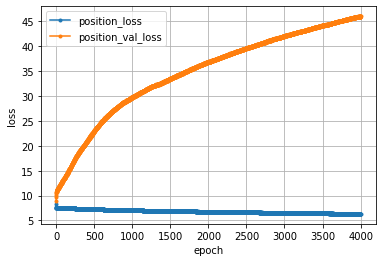

In [8]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()